In [2]:
import numpy as np

from sklearn.datasets import load_breast_cancer 

data = load_breast_cancer()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data.feature_names[4],data.feature_names[3]

('mean smoothness', 'mean area')

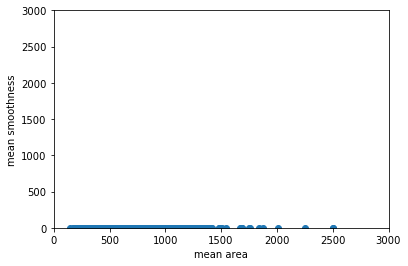

In [5]:
plt.scatter(data.data[:,3], data.data[:,4])
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

In [6]:
X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train_scale = scaler.transform(X_train)

In [10]:
X_train_scale.mean(axis=0), X_train_scale.std(axis=0)

(array([ -8.97694617e-16,  -3.35165351e-15,   3.23355506e-15,
         -2.22727819e-15,  -1.46512838e-15,   5.31740403e-16,
          6.61497719e-16,   4.76053873e-16,  -5.68678194e-15,
          6.94804409e-16,   4.90450171e-17,   5.76827963e-16,
          8.10706813e-16,   1.82881793e-16,   1.79160716e-15,
          4.15540618e-16,   3.25502751e-16,   6.02265490e-16,
         -1.51771148e-16,   1.34580991e-15,  -4.28960896e-16,
          4.92402212e-16,  -1.51795548e-15,   1.32494748e-16,
          5.92337534e-15,  -4.70369317e-16,  -1.36923440e-15,
          2.56327316e-16,  -2.12333204e-15,   1.99242332e-15]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.]))

In [11]:
X_train.mean(axis=0), X_train.std(axis=0)

(array([  1.41124989e+01,   1.91528791e+01,   9.18182857e+01,
          6.53819121e+02,   9.64133407e-02,   1.03318659e-01,
          8.74845356e-02,   4.86900264e-02,   1.80939121e-01,
          6.26680220e-02,   4.02523516e-01,   1.20988066e+00,
          2.82524681e+00,   4.02856176e+01,   7.00339341e-03,
          2.50632286e-02,   3.14727859e-02,   1.16463495e-02,
          2.05252703e-02,   3.71029516e-03,   1.62560967e+01,
          2.55387473e+01,   1.07031407e+02,   8.81189890e+02,
          1.32459231e-01,   2.51861846e-01,   2.67491334e-01,
          1.14447673e-01,   2.90416044e-01,   8.34914286e-02]),
 array([  3.53148742e+00,   4.15439017e+00,   2.42862794e+01,
          3.57772373e+02,   1.37841928e-02,   5.04344575e-02,
          7.77159693e-02,   3.85550295e-02,   2.73677762e-02,
          6.81132951e-03,   2.84057900e-01,   5.41365325e-01,
          2.03551332e+00,   4.76779413e+01,   2.84053720e-03,
          1.74905171e-02,   3.10715741e-02,   5.89071328e-03,
      

In [12]:
X_test_scale = scaler.transform(X_test)

In [13]:
X_test_scale.mean(axis=0), X_test_scale.std(axis=0)

(array([ 0.02090746,  0.16431947,  0.03098112,  0.01492717, -0.01921272,
         0.10117401,  0.0844404 ,  0.02966118,  0.04062282,  0.09495981,
         0.04653793,  0.06428685,  0.10007503,  0.00538732,  0.06604308,
         0.11840198,  0.06761678,  0.12691574,  0.01038083,  0.16199868,
         0.01337734,  0.11341872,  0.03390329, -0.00517026, -0.02001641,
         0.07842833,  0.11756483,  0.01212835, -0.02700757,  0.12745382]),
 array([ 0.98484055,  1.15221352,  0.99783441,  0.91061412,  1.09332501,
         1.20997119,  1.11614317,  1.02702513,  1.0034221 ,  1.16404942,
         0.86929934,  1.0858183 ,  0.95738032,  0.73797558,  1.25386932,
         1.10490478,  0.84120579,  1.20933979,  1.04289005,  1.05896921,
         0.94112182,  1.03290198,  0.96071254,  0.84629366,  1.04571542,
         1.12996138,  1.20450506,  1.03208579,  0.90829415,  1.06246714]))

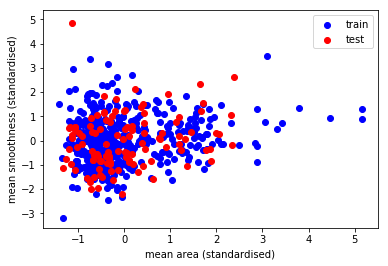

In [14]:
plt.scatter(X_train_scale[:, 3], 
            X_train_scale[:, 4], c='blue', 
            label="train")
plt.scatter(X_test_scale[:, 3],  
            X_test_scale[:, 4],  c='red',  
            label="test")
plt.xlabel(data.feature_names[3] + " (standardised)")
plt.ylabel(data.feature_names[4] + " (standardised)")
plt.legend(loc="best");

In [15]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [16]:
clf.fit(X_train_scale, y_train)
print(clf.score(X_test_scale, y_test))

0.964912280702


In [17]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler([-1,1])

In [19]:
mmscaler.fit(X_train)
X_train_mms = mmscaler.transform(X_train)
X_test_mms  = mmscaler.transform(X_test)

In [20]:
X_train_mms.max(axis=0), X_train_mms.min(axis=0)

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.]))

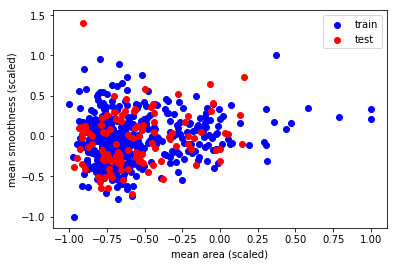

In [21]:
plt.scatter(X_train_mms[:, 3], 
            X_train_mms[:, 4], c='blue', 
            label="train")
plt.scatter(X_test_mms[:, 3],  
            X_test_mms[:, 4],  c='red',  
            label="test")
plt.xlabel(data.feature_names[3] + " (scaled)")
plt.ylabel(data.feature_names[4] + " (scaled)")
plt.legend(loc="best");

In [22]:
clf.fit(X_train_mms, y_train)
print(clf.score(X_test_mms, y_test))

0.964912280702


In [23]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [24]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [25]:
np.linalg.norm(X_train_norm, axis=1)[:20]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [26]:
clf.fit(X_train_norm, y_train)
print(clf.score(X_test_norm, y_test))

0.719298245614


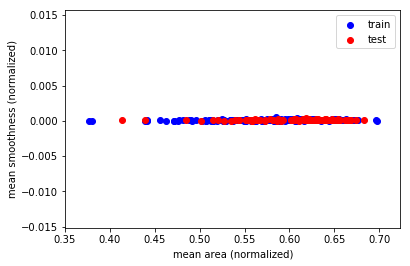

In [27]:
plt.scatter(X_train_norm[:, 3], 
            X_train_norm[:, 4], c='blue', 
            label="train")
plt.scatter(X_test_norm[:, 3], 
            X_test_norm[:, 4],  c='red',  
            label="test")
plt.xlabel(data.feature_names[3] + " (normalized)")
plt.ylabel(data.feature_names[4] + " (normalized)")
plt.legend(loc="best");

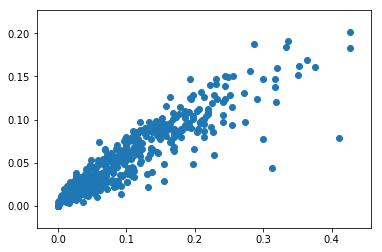

In [28]:
plt.scatter(data.data[:,6],data.data[:,7])

(0, 0.5)

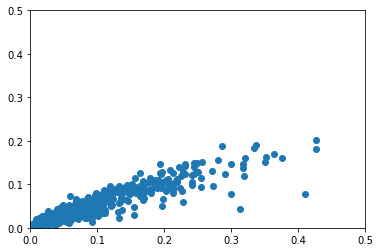

In [29]:
X = data.data[:, [6,7]]
y = data.target
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

(-0.25, 0.25)

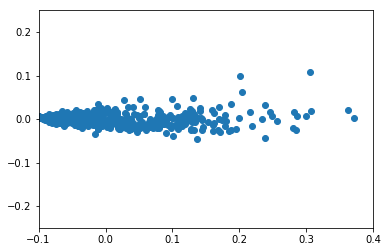

In [32]:
from sklearn.decomposition import PCA
pca  = PCA()
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

(-4, 10)

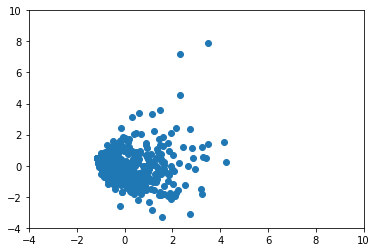

In [33]:
pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-4, 10)
plt.ylim(-4, 10)

(-3, 3)

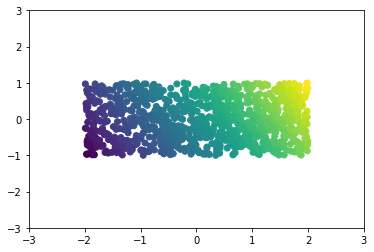

In [34]:
X = np.random.uniform(low=-1, high=1, size=(1000,2)) * (2,1)
y = 2 * X[:,0] + X[:,1]
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [35]:
angle = np.pi/4

In [36]:
R = np.array([[np.sin(angle), -np.cos(angle)],
              [np.cos(angle), np.sin(angle)]])
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

(-3, 3)

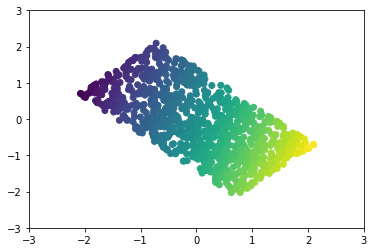

In [37]:
X_rot = X.dot(R)
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [38]:
X = X_rot

In [ ]:
pca = PCA(whiten=False)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("PCA")